In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# Carregar os dados
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Visualizar as primeiras linhas dos dados de treinamento
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Visualizar as primeiras linhas dos dados de test
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
Id_no = test['Id']
# Visualizar últimas linhas 
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
# Resumo estatístico do DataFrame de treinamento
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# O número de linhas e colunas presentes no DataFrame.
# Aqui significa que o conjunto de treinamento possui 1460 amostras (registros) e 81 atributos (colunas).
train.shape

(1460, 81)

In [7]:
# Utilizado para obter informações detalhadas sobre o DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
print(list(train.columns))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [9]:
print(list(test.columns),end=' ')

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

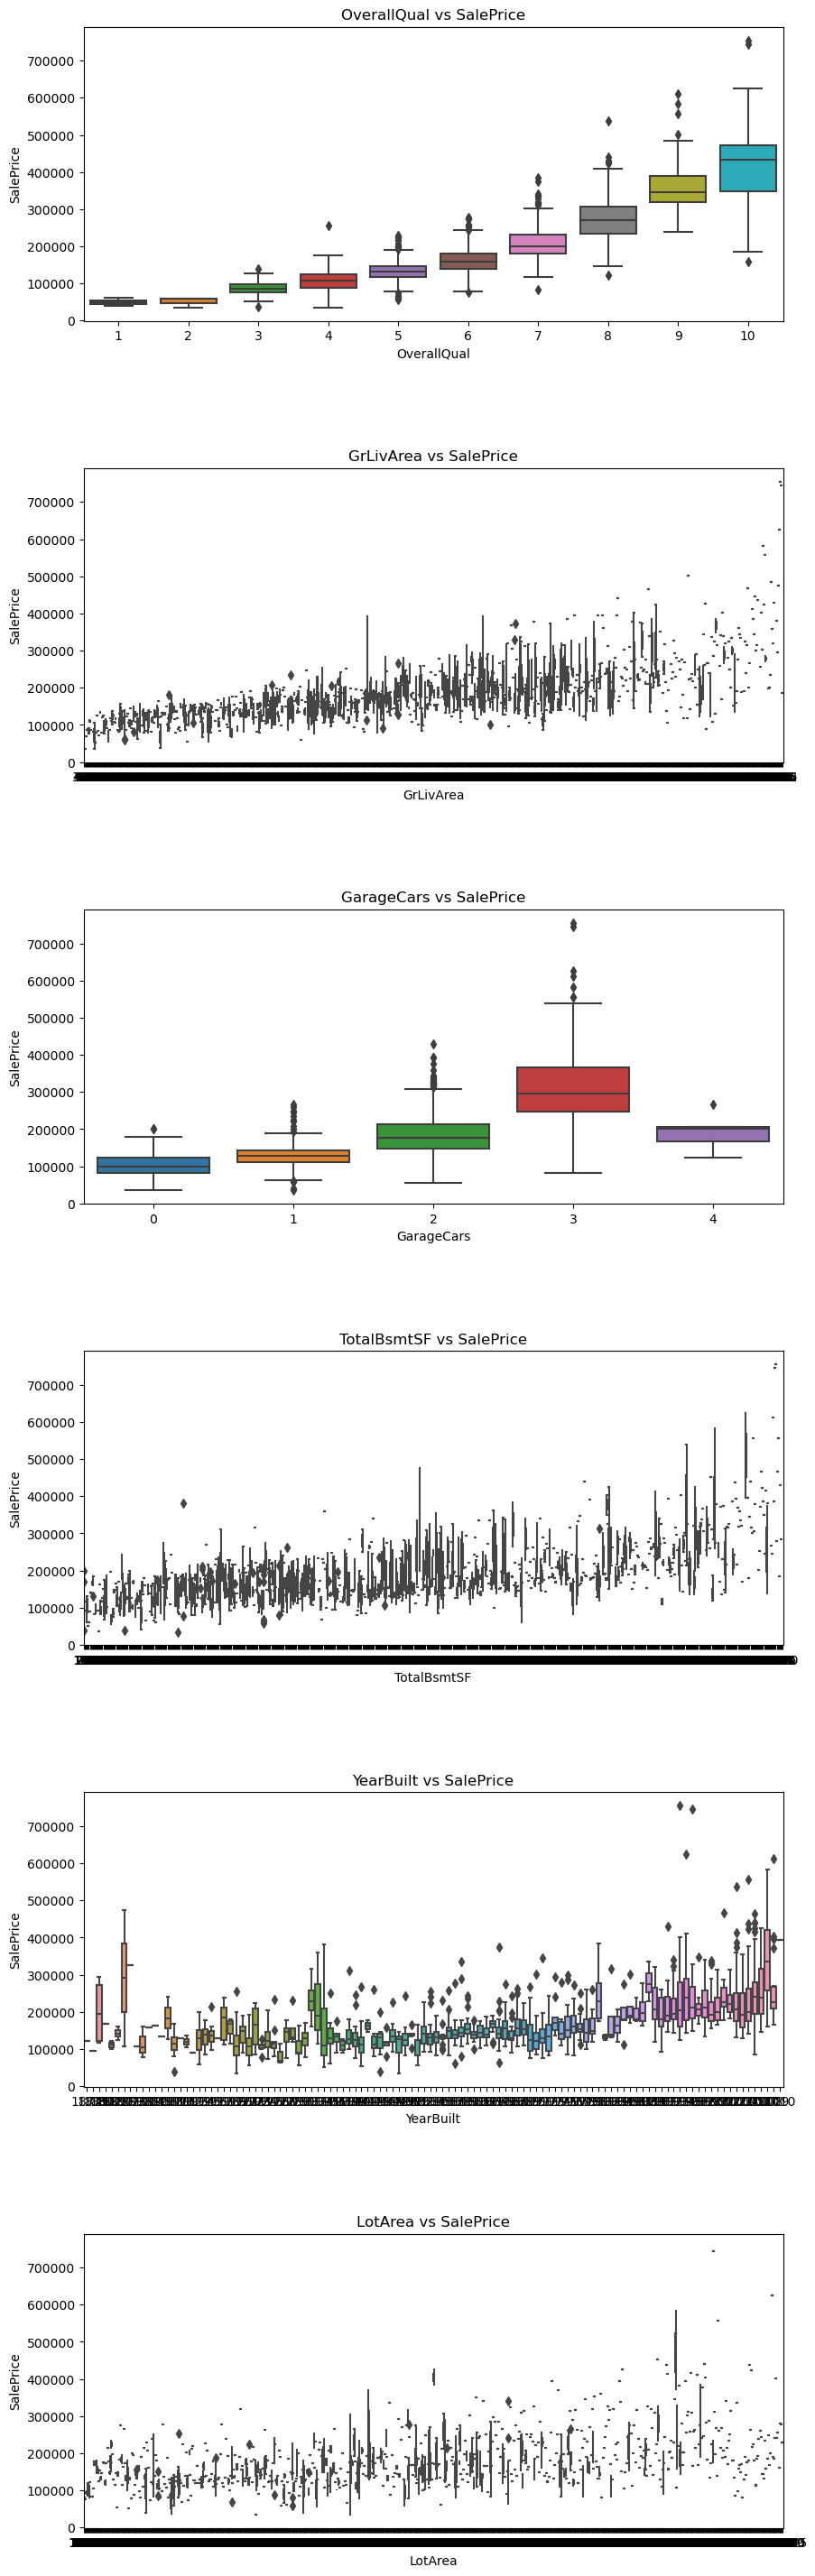

In [10]:
# Selecionar as 5 colunas mais importantes.
top_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']

# Criar subtramas utilizando Seaborn
fig, axes = plt.subplots(nrows=len(top_columns), figsize=(10, 6*len(top_columns)))
plt.subplots_adjust(hspace=0.5)

# Iterar sobre as subtramas e plotar os gráficos das colunas selecionadas
for i, column in enumerate(top_columns):
    sns.boxplot(x=column, y='SalePrice', data=train, ax=axes[i])
    axes[i].set_title(f'{column} vs SalePrice')

# Exibir as subtramas
plt.show()

In [11]:
# Limpar os dados
def clean_data(df):
    cols = list(df.columns)
    null_list = list(df.isna().sum())
    null_list = [x / len(df) for x in null_list]
    for i in range(len(null_list)):
        if null_list[i] >= 0.75:
            df.drop(cols[i], axis=1, inplace=True)

In [12]:
clean_data(train)
clean_data(test)

In [13]:
train.shape

(1460, 77)

In [14]:
# Remover valores nulos
def remove_null(df):
    num_col = []
    cat_col = []
    for i in df.columns:
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
            num_col.append(i)
        else:
            cat_col.append(i)
    for i in num_col:
        df[i].fillna(df[i].median(), inplace=True)
    df.fillna("NoResult", inplace=True)

In [15]:
remove_null(train)
remove_null(test)

In [16]:
# Contagem dos valores ausentes (NaN) em cada coluna do DataFrame train e imprime o resultado como uma lista.
print(list(train.isna().sum()),end=' ')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

In [17]:
print(list(test.isna().sum()),end=' ')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

In [18]:
# Codificar variáveis categóricas
cat_col = [x for x in train.columns if train[x].dtypes == 'object']
cat_col1 = [x for x in test.columns if test[x].dtypes == 'object']

for col in cat_col:
    train[col] = train[col].astype('category').cat.codes

for col in cat_col1:
    test[col] = test[col].astype('category').cat.codes

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [20]:
test.shape

(1459, 76)

In [21]:
train.shape

(1460, 77)

In [22]:
# Separar os dados de treinamento e teste
X = train.drop("SalePrice", axis=1)
y = train['SalePrice']

In [23]:
# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

In [59]:
# Dividir os dados em conjunto de treinamento e conjunto de validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, shuffle=True, random_state=42)

In [61]:
# Criar e treinar o modelo MLP
#model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', random_state=42, max_iter=200)
model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=42, max_iter=400)
model.fit(X_train, y_train)

E:\Devs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=400, random_state=42)

In [62]:
# Avaliar o modelo
# Obter as predições do modelo
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Erro médio quadrado (MSE) - Treinamento: {train_mse}")
print(f"Erro médio quadrado (MSE) - Validação: {val_mse}")

Erro médio quadrado (MSE) - Treinamento: 2854860277.6530156
Erro médio quadrado (MSE) - Validação: 2605251582.2435994


In [63]:
# Calcular o erro (diferença entre os valores reais e preditos)
train_error = y_train - y_train_pred
val_error = y_val - y_val_pred

In [64]:
# Calcular a acurácia
train_accuracy = model.score(X_train, y_train)
val_accuracy = model.score(X_val, y_val)

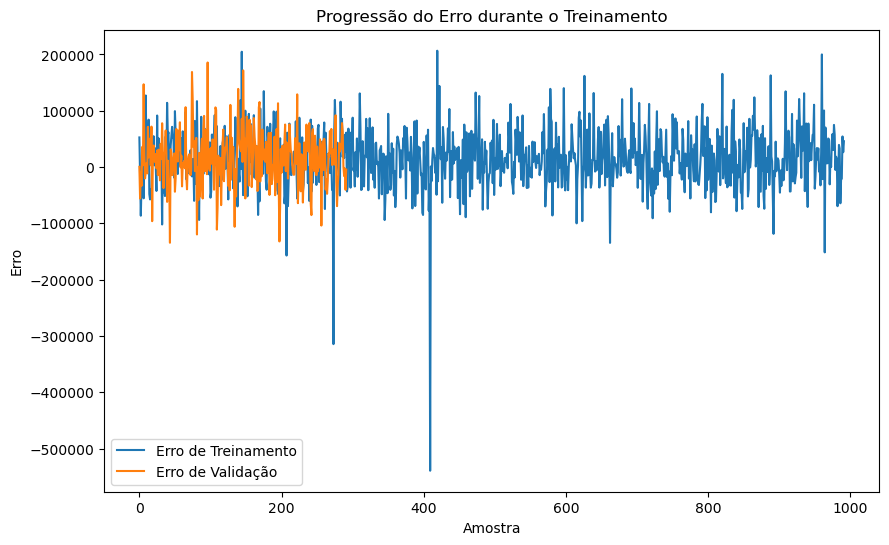

In [65]:
# Plotar o gráfico de erro
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_error)), train_error, label='Erro de Treinamento')
plt.plot(range(len(val_error)), val_error, label='Erro de Validação')
plt.xlabel('Amostra')
plt.ylabel('Erro')
plt.title('Progressão do Erro durante o Treinamento')
plt.legend()
plt.show()

In [66]:
# acurácia é mais comumente usada em problemas de classificação.
# Exibir a acurácia
print("Acurácia do treinamento:", train_accuracy)
print("Acurácia da validação:", val_accuracy)

Acurácia do treinamento: 0.5258363373056736
Acurácia da validação: 0.660346703403244


In [67]:
# Realizar previsões nos dados de teste
predictions = model.predict(test)

In [68]:
# Exibir algumas previsões
for i in range(5):
    print(f"Preço previsto para a amostra {i+1}: {predictions[i]}")

Preço previsto para a amostra 1: 131323.6076093444
Preço previsto para a amostra 2: 208852.1447085188
Preço previsto para a amostra 3: 156834.56025198248
Preço previsto para a amostra 4: 190780.9437850085
Preço previsto para a amostra 5: 153729.086668131


In [69]:
#model.fit(X_train, y_train)
preds = model.predict(test)

In [70]:
df=pd.DataFrame({
    "Id":Id_no.values,
    "SalePrice":preds
})

In [71]:
df.to_csv("SubmissionFabio.csv",index=False)